In [1]:
import pandas as pd


pd.read_csv('eval.csv')

,dataset,psnr,ssim,lpips,algo,r,max mem
0,objaverse,22.595268,0.808961,0.179061,Base,0.0,1945.079102
1,GSO,22.595268,0.856961,0.179061,Base,0.0,1945.079102
2,objaverse,22.595268,0.808961,0.179061,Our,0.1,1945.079102
3,GSO,24.713797,0.856909,0.152597,Our,0.1,1944.693359
4,real,24.282581,0.900060,0.100357,Our,0.1,1672.683105
...,...,...,...,...,...,...,...
131,GSO,24.321959,0.848287,0.161085,ToMeSD,0.8,1943.958008
132,real,23.769260,0.898734,0.103811,ToMeSD,0.8,1671.825684
133,objaverse,22.245504,0.792337,0.188704,ToMeSD,0.9,1946.079102
134,GSO,24.505026,0.847093,0.160679,ToMeSD,0.9,1943.370117


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('eval.csv')

<Axes: xlabel='r', ylabel='ssim'>

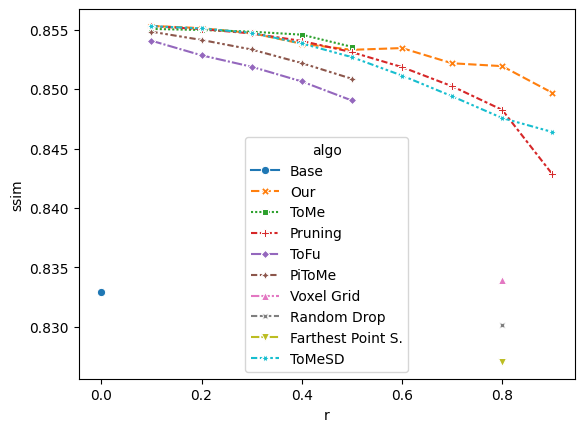

In [3]:
sns.lineplot(data=df, x='r', y='ssim', hue='algo', errorbar=None, markers=True, style='algo')

In [4]:
import pyviz3d as viz

In [5]:
import os
import pyviz3d.visualizer as viz

def visualize_extracted_features(
    coord, colors, normals, segment, pred,
    hooked_layer_names, extracted_features, path):
    
    v = viz.Visualizer()
    
    layer_id = 0
    for module_name, feats in zip(hooked_layer_names, extracted_features):
        
        vertices = feats["coords"].detach().cpu().numpy() 
        vertices -= vertices.mean(0)
        
        for i in range(len(feats["attn_feats"])):
            attn_feat = feats["attn_feats"][i].detach()
            pca_color_attn = get_pca_color(attn_feat.reshape(-1, attn_feat.shape[-1])).squeeze()
            # breakpoint()
            v.add_points(f'feat_{layer_id//4};{layer_id}_attn_{i}', vertices, pca_color_attn, point_size=20, visible=False)
            pass

        segment_colors = segment_color_codes[feats["segment_ids"].cpu().numpy().astype(np.int32)].squeeze()
        
        point_size = 20
        # breakpoint()
        v.add_points(f'feat_{layer_id//4};{layer_id}_segments', vertices, segment_colors, point_size=point_size, visible=False)
        if feats["merged_infos"] is not None:
            for i in range(len(feats["merged_infos"])):
                merged_colors = feats["merged_infos"][i].detach().cpu().numpy()
                merge_colors = (merged_colors * 255).astype(np.uint8)
                v.add_points(f'feat_{layer_id//4};{layer_id}_merge_{i}', vertices, merge_colors, point_size=point_size, visible=False)
            
        layer_id += 1
    
    point_semantic_colors = create_color_palette()[np.array(VALID_CLASS_IDS_20)[pred]]
    gt_semantic_colors = create_color_palette()[np.array(VALID_CLASS_IDS_20)[segment]]
    
    error = (pred != segment) & (segment >= 0)
    error_color = np.zeros_like(coord)
    error_color[error] = np.array([255, 0, 0])

    coord -= coord.mean(0)

    point_colors = ((colors + 1.0) / 2.0) * 255
    point_size = 20
    v.add_points('input', coord, point_colors, point_size=point_size, normals=normals, visible=True)
    v.add_points('pred', coord, point_semantic_colors, point_size=point_size, normals=normals, visible=False)
    v.add_points('gt', coord, gt_semantic_colors, point_size=point_size, normals=normals, visible=False)
    v.add_points('error', coord, error_color, point_size=point_size, normals=normals, visible=False)
    
    viz_path = os.path.join(path)
    v.save(viz_path)

In [6]:
import numpy as np
import pyviz3d.visualizer as viz


def test(path):

    # First, we set up a visualizer
    v = viz.Visualizer()

    # Random point clouds.
    for j in range(5):
        i = j + 1
        name = 'Points;'+str(i)
        num_points = 3
        point_positions = np.random.random(size=[num_points, 3])
        point_colors = (np.random.random(size=[num_points, 3]) * 255).astype(np.uint8)
        point_size = 25 * i

        # Here we add point clouds to the visualizer
        v.add_points(name, point_positions, point_colors, point_size=point_size, visible=False)

    # Sample point clouds from the ScanNet dataset.
    for scene_name in ['scene0140_01', 'scene0451_01']:
        scene = np.load(path + scene_name + '.npy')
        point_positions = scene[:, 0:3]
        print(point_positions.shape)
        point_colors = scene[:, 3:6]
        print(point_colors.shape)
        point_size = 30

        # Add more point clouds
        v.add_points(scene_name, point_positions, point_colors, point_size=point_size)

    # When we added everything we need to the visualizer, we save it.
    v.save('test')


test(path='/home/phuc/PyViz3D/examples/data/')


(135046, 3)
(135046, 3)
(107046, 3)
(107046, 3)

************************************************************************
1) Start local server:
    cd /home/phuc/SplatFormer/test; python -m http.server 6008
2) Open in browser:
    http://0.0.0.0:6008
************************************************************************


In [7]:
import torch

a = torch.randint(0, 100, (200, 2, 128,16))

In [8]:
a

tensor([[[[71, 36, 54,  ..., 25, 74, 77],
          [23, 57, 82,  ..., 58,  4, 11],
          [13, 43, 47,  ..., 71,  3, 20],
          ...,
          [29, 39, 33,  ..., 85, 35, 87],
          [64, 23, 16,  ..., 34, 81, 56],
          [70, 27, 31,  ..., 40, 93, 24]],

         [[98,  6, 46,  ..., 83, 14, 72],
          [13, 29, 56,  ..., 80, 37, 91],
          [77, 75, 12,  ...,  2, 16, 74],
          ...,
          [ 7, 56, 91,  ..., 43,  1, 18],
          [69, 27, 23,  ..., 99, 81, 40],
          [22, 33, 23,  ..., 65, 10, 19]]],


        [[[70, 24, 72,  ...,  7, 16, 10],
          [56, 94, 11,  ..., 70, 88, 52],
          [16, 34, 12,  ..., 97, 95, 85],
          ...,
          [99, 42,  2,  ..., 56, 76, 25],
          [91, 32,  0,  ..., 64, 21, 26],
          [ 1, 40, 27,  ..., 61, 77, 83]],

         [[61, 78,  8,  ..., 52, 53, 97],
          [95,  7,  2,  ..., 42, 91, 93],
          [22, 36, 67,  ..., 44, 29, 97],
          ...,
          [52, 93, 55,  ..., 38, 52, 15],
        

In [9]:
b = torch.randint(0,100,(200,))

In [10]:
mask = torch.where(b > 50, True, False)[..., None, None, None].expand(a.shape )
idx = torch.arange(a.shape[0])[..., None, None, None].expand(a.shape)

In [11]:
a.shape

torch.Size([200, 2, 128, 16])

In [12]:
a_1 = a.masked_select(mask).view(-1, a.shape[1], a.shape[2], a.shape[3])
a_2 = a.masked_select(~mask).view(-1, a.shape[1], a.shape[2], a.shape[3])
a_1_idx = idx.masked_select(mask).view(-1, a.shape[1], a.shape[2], a.shape[3])
a_2_idx = idx.masked_select(~mask).view(-1, a.shape[1], a.shape[2], a.shape[3])

In [13]:
a_1_idx

tensor([[[[  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          ...,
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1]],

         [[  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          ...,
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1]]],


        [[[  2,   2,   2,  ...,   2,   2,   2],
          [  2,   2,   2,  ...,   2,   2,   2],
          [  2,   2,   2,  ...,   2,   2,   2],
          ...,
          [  2,   2,   2,  ...,   2,   2,   2],
          [  2,   2,   2,  ...,   2,   2,   2],
          [  2,   2,   2,  ...,   2,   2,   2]],

         [[  2,   2,   2,  ...,   2,   2,   2],
          [  2,   2,   2,  ...,   2

In [14]:
a_1.shape

torch.Size([97, 2, 128, 16])

In [15]:
idx = torch.cat([a_1_idx, a_2_idx], dim=0)

In [16]:
a_2_idx

tensor([[[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]],


        [[[  3,   3,   3,  ...,   3,   3,   3],
          [  3,   3,   3,  ...,   3,   3,   3],
          [  3,   3,   3,  ...,   3,   3,   3],
          ...,
          [  3,   3,   3,  ...,   3,   3,   3],
          [  3,   3,   3,  ...,   3,   3,   3],
          [  3,   3,   3,  ...,   3,   3,   3]],

         [[  3,   3,   3,  ...,   3,   3,   3],
          [  3,   3,   3,  ...,   3

In [17]:
a

tensor([[[[71, 36, 54,  ..., 25, 74, 77],
          [23, 57, 82,  ..., 58,  4, 11],
          [13, 43, 47,  ..., 71,  3, 20],
          ...,
          [29, 39, 33,  ..., 85, 35, 87],
          [64, 23, 16,  ..., 34, 81, 56],
          [70, 27, 31,  ..., 40, 93, 24]],

         [[98,  6, 46,  ..., 83, 14, 72],
          [13, 29, 56,  ..., 80, 37, 91],
          [77, 75, 12,  ...,  2, 16, 74],
          ...,
          [ 7, 56, 91,  ..., 43,  1, 18],
          [69, 27, 23,  ..., 99, 81, 40],
          [22, 33, 23,  ..., 65, 10, 19]]],


        [[[70, 24, 72,  ...,  7, 16, 10],
          [56, 94, 11,  ..., 70, 88, 52],
          [16, 34, 12,  ..., 97, 95, 85],
          ...,
          [99, 42,  2,  ..., 56, 76, 25],
          [91, 32,  0,  ..., 64, 21, 26],
          [ 1, 40, 27,  ..., 61, 77, 83]],

         [[61, 78,  8,  ..., 52, 53, 97],
          [95,  7,  2,  ..., 42, 91, 93],
          [22, 36, 67,  ..., 44, 29, 97],
          ...,
          [52, 93, 55,  ..., 38, 52, 15],
        

In [18]:
torch.zeros(a.shape, dtype=a_1.dtype).scatter_(dim=0, index=idx, src=torch.cat([a_1,a_2]))


# a_new.scatter_(dim=0, index=a_2_idx, src=a_2.float())

tensor([[[[71, 36, 54,  ..., 25, 74, 77],
          [23, 57, 82,  ..., 58,  4, 11],
          [13, 43, 47,  ..., 71,  3, 20],
          ...,
          [29, 39, 33,  ..., 85, 35, 87],
          [64, 23, 16,  ..., 34, 81, 56],
          [70, 27, 31,  ..., 40, 93, 24]],

         [[98,  6, 46,  ..., 83, 14, 72],
          [13, 29, 56,  ..., 80, 37, 91],
          [77, 75, 12,  ...,  2, 16, 74],
          ...,
          [ 7, 56, 91,  ..., 43,  1, 18],
          [69, 27, 23,  ..., 99, 81, 40],
          [22, 33, 23,  ..., 65, 10, 19]]],


        [[[70, 24, 72,  ...,  7, 16, 10],
          [56, 94, 11,  ..., 70, 88, 52],
          [16, 34, 12,  ..., 97, 95, 85],
          ...,
          [99, 42,  2,  ..., 56, 76, 25],
          [91, 32,  0,  ..., 64, 21, 26],
          [ 1, 40, 27,  ..., 61, 77, 83]],

         [[61, 78,  8,  ..., 52, 53, 97],
          [95,  7,  2,  ..., 42, 91, 93],
          [22, 36, 67,  ..., 44, 29, 97],
          ...,
          [52, 93, 55,  ..., 38, 52, 15],
        

In [19]:
import pandas as pd 


data = pd.read_csv('eval.csv')

In [20]:
dataset = 'objaverse'
algo = 'patch'
data_obj = data[data['dataset']==dataset]
data_obj_tome = data_obj[data_obj['algo']==algo] 

In [21]:
data_obj_tome

,dataset,psnr,ssim,lpips,algo,r,max mem


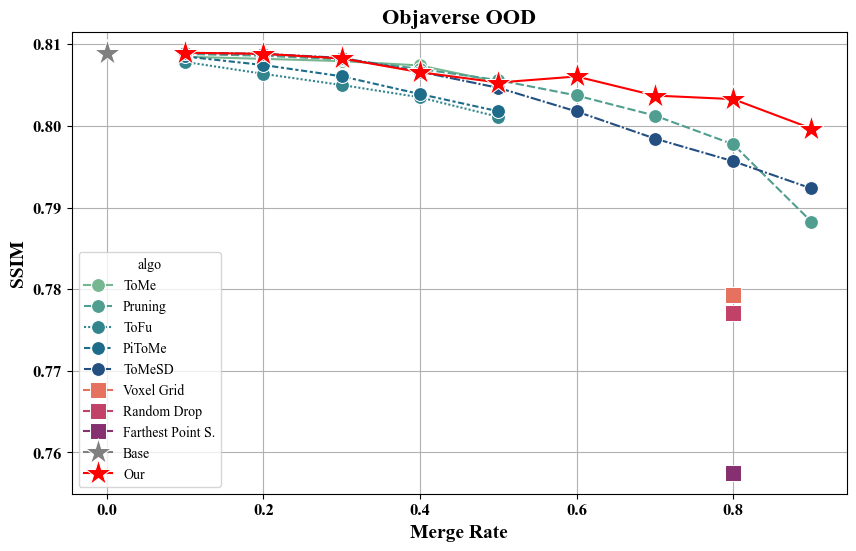

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('eval.csv')
df_ob = df[df['dataset'] == 'objaverse']
df_ob_downsample = df_ob[df_ob['algo'].isin(['Farthest Point S.', 'Random Drop', 'Voxel Grid']) ]
df_ob_our = df_ob[df_ob['algo'].isin(['Our', 'Base']) ]
df_ob_merge = df_ob[~df_ob['algo'].isin(['Farthest Point S.', 'Random Drop', 'Voxel Grid', 'Our', 'Base']) ]
palette = {
    'Base': 'gray',
    'Our': 'Red',
}

plt.rcParams['font.family'] = 'Times New Roman'
# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ob_merge, x='r', y='ssim', hue='algo',style='algo', marker='o', palette='crest', markersize=10)
sns.lineplot(data=df_ob_downsample, x='r', y='ssim', hue='algo',marker='s', palette='flare',markersize=12)
sns.lineplot(data=df_ob_our, x='r', y='ssim', hue='algo',marker='*', palette=palette, markersize=20)

# Customize the plot
plt.title('Objaverse OOD', fontsize=16, fontweight='bold')
plt.xlabel('Merge Rate', fontsize=14, fontweight='bold')
plt.ylabel('SSIM', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show the plot
plt.grid(True)
plt.show()

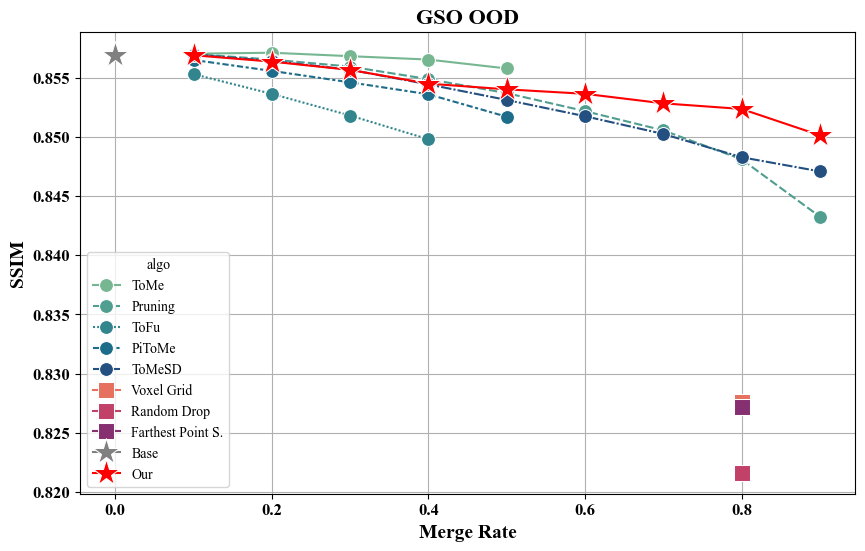

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('eval.csv')
df_ob = df[df['dataset'] == 'GSO']
df_ob_downsample = df_ob[df_ob['algo'].isin(['Farthest Point S.', 'Random Drop', 'Voxel Grid']) ]
df_ob_our = df_ob[df_ob['algo'].isin(['Our', 'Base']) ]
df_ob_merge = df_ob[~df_ob['algo'].isin(['Farthest Point S.', 'Random Drop', 'Voxel Grid', 'Our', 'Base']) ]
palette = {
    'Base': 'gray',
    'Our': 'Red',
}
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ob_merge, x='r', y='ssim', hue='algo',style='algo', marker='o', palette='crest', markersize=10)
sns.lineplot(data=df_ob_downsample, x='r', y='ssim', hue='algo',marker='s', palette='flare',markersize=12)
sns.lineplot(data=df_ob_our, x='r', y='ssim', hue='algo',marker='*', palette=palette, markersize=20)

# Customize the plot
plt.title('GSO OOD', fontsize=16, fontweight='bold')
plt.xlabel('Merge Rate', fontsize=14, fontweight='bold')
plt.ylabel('SSIM', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show the plot
plt.grid(True)
plt.show()